In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('C:/Users/test4/Desktop/대학 강의/2-2/데이터처리프로그래밍/dataset/abalone2.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df[df.Height>0.2]
df.Height.min()

0.205

In [12]:
df.groupby('Rings').count()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,,
8,1,1,1,1,1,1,1,1
9,7,7,7,7,7,7,7,7
10,20,20,20,20,20,20,20,20
11,32,32,32,32,32,32,32,32
12,17,17,17,17,17,17,17,17
13,19,19,19,19,19,19,19,19
14,16,16,16,16,16,16,16,16
15,6,6,6,6,6,6,6,6
16,10,10,10,10,10,10,10,10


In [13]:
df.groupby('Rings')['Shucked weight'].mean()

Rings
8     0.332000
9     0.728857
10    0.883750
11    0.840219
12    0.884324
13    0.757711
14    0.667344
15    0.534000
16    0.604100
17    0.760222
18    0.560833
19    0.822500
20    0.612875
21    0.637000
22    0.564000
23    0.378000
24    0.667500
25    0.426500
27    0.753500
Name: Shucked weight, dtype: float64

In [14]:
df.groupby('Rings')['Shucked weight', 'Whole weight', 'Shell weight'].mean()

C:\Users\test4\AppData\Local\Temp\ipykernel_17880\3136190708.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Rings')['Shucked weight', 'Whole weight', 'Shell weight'].mean()


,Shucked weight,Whole weight,Shell weight
Rings,,,
8,0.332000,0.594000,0.133500
9,0.728857,1.579500,0.412357
10,0.883750,1.895175,0.493400
11,0.840219,1.846859,0.491281
12,0.884324,2.013941,0.531000
13,0.757711,1.772000,0.497289
14,0.667344,1.664594,0.507406
15,0.534000,1.406667,0.428500
16,0.604100,1.619300,0.566900


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

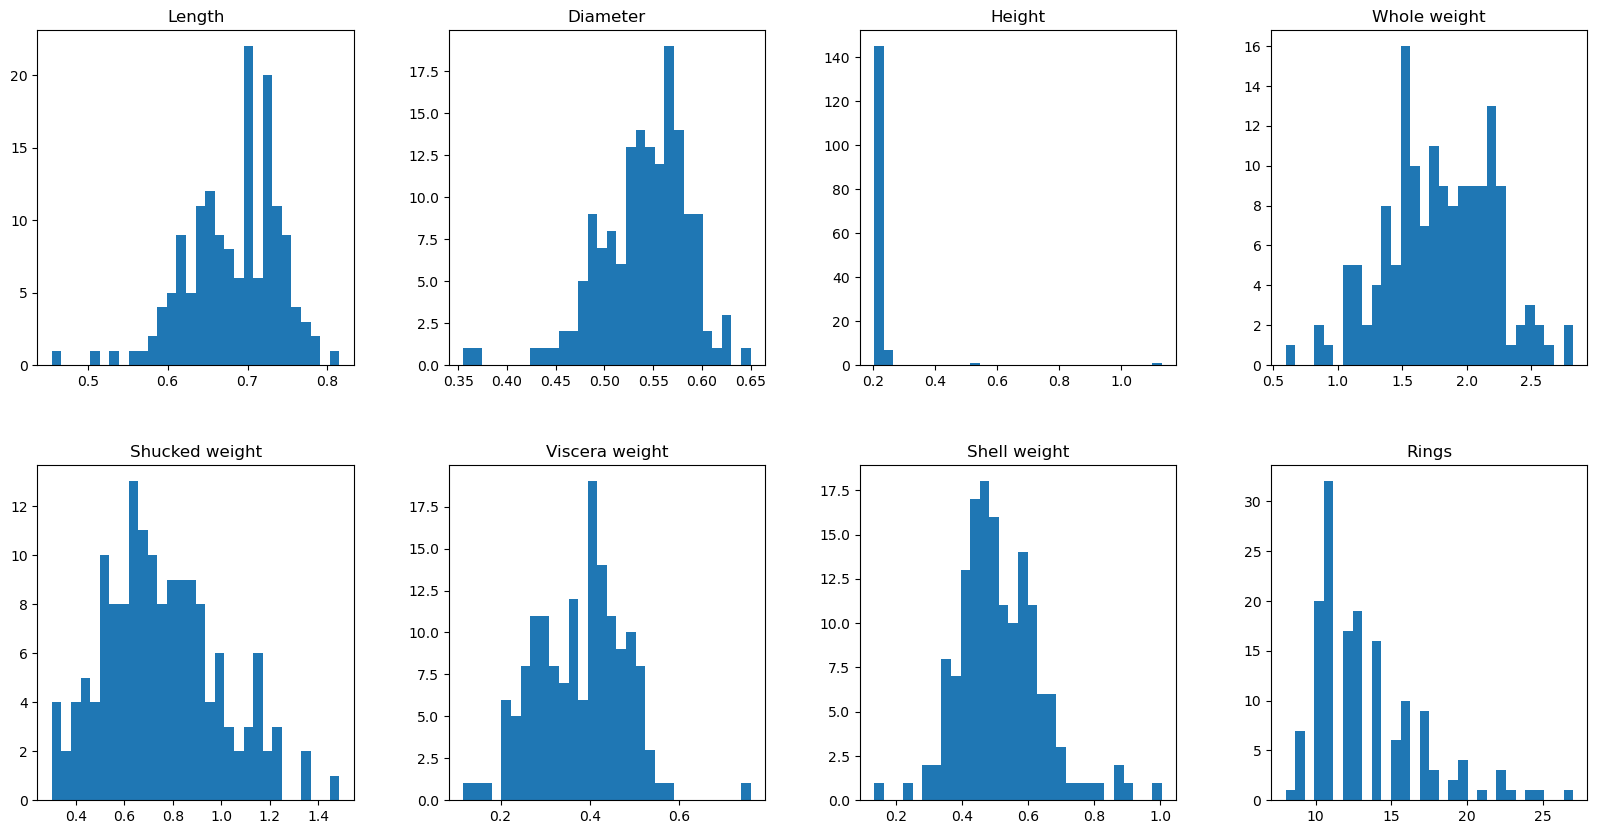

In [15]:
df.hist(figsize=(20,10), grid= False, layout=(2,4), bins = 30)

<AxesSubplot:xlabel='Sex', ylabel='count'>

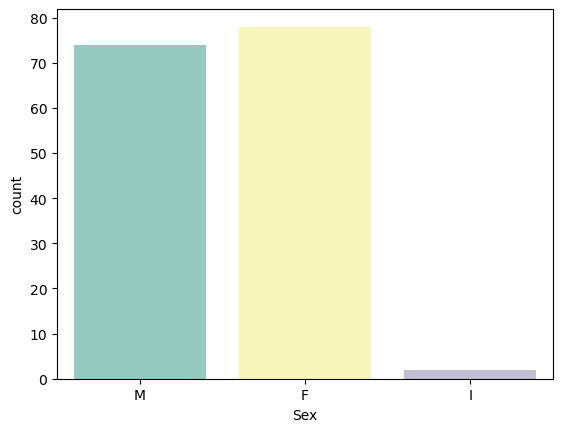

In [16]:
import seaborn as sns
sns.countplot(x = 'Sex', data = df, palette = 'Set3')